# COMPSCI 371 Homework 2

_**Group Members:**_ Phillip Sievers, Gordon Liang, Jose Rivera

### Problem 0 (3 points)

## Part 1: The Loss Function Matters

### Problem 1.1 (Exam Style)

We want to solve:

$$
B
\begin{bmatrix}
b \\
w
\end{bmatrix}
=
\vec{b}
$$

where

$$
B = A^{T}A
\quad \text{and} \quad
\vec{b} = A^{T}y
$$

We have given:

$$
A =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3
\end{bmatrix},
\quad
y =
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$

$$
T = \{ (x_1, y_1), (x_2, y_2), (x_3, y_3) \}
= \{ (-1,0), (0,1), (1,0) \}
$$

We plug in the values

$$
A =
\begin{bmatrix}
1 & -1 \\
1 & 0 \\
1 & 1
\end{bmatrix},
\quad
A^{T} =
\begin{bmatrix}
1 & 1 & 1 \\
-1 & 0 & 1
\end{bmatrix},
\quad
y =
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}
$$
$$
\begin{align}
    
    B &= A^{T}A =
    \begin{bmatrix}
    1 & 1 & 1 \\
    -1 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
    1 & -1 \\
    1 & 0 \\
    1 & 1
    \end{bmatrix}
    =
    \begin{bmatrix}
    3 & 0 \\
    0 & 2
    \end{bmatrix} \\
    \vec{b} &= A^{T}y =
    \begin{bmatrix}
    1 & 1 & 1 \\
    -1 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
    0 \\
    1 \\
    0
    \end{bmatrix}
    =
    \begin{bmatrix}
    1 \\
    0
    \end{bmatrix}
    
\end{align}
$$
Plugging into the equation we get
$$
\begin{align}
    \begin{bmatrix}
    3 & 0 \\
    0 & 2
    \end{bmatrix}
    \begin{bmatrix}
    b \\
    w
    \end{bmatrix}
    &=
    \begin{bmatrix}
    1 \\
    0
    \end{bmatrix}
    \\
    \begin{bmatrix}
    3b \\
    2w
    \end{bmatrix}
    &= 
    \begin{bmatrix}
    1 \\
    0
    \end{bmatrix}
\end{align}
$$
This gives us the exact solutions: 
$$
\begin{align}
b^* &= \frac{1}{3} \\
w^* &= 0
\end{align}
$$

Text(1.6, 0.45, 'y = 1/3')

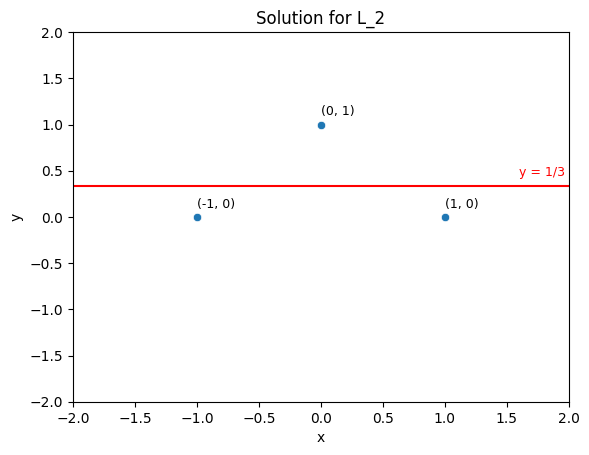

In [15]:
#plotting the problem
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

x_vals = [-1, 0, 1]
y_vals = [0, 1, 0]

sb.scatterplot(x=x_vals, y=y_vals)
plt.plot([-2, 2], [1/3, 1/3], color='red')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution for L_2')
for x, y in zip(x_vals, y_vals):
    plt.text(x, y + 0.1 , f'({x}, {y})', fontsize=9)
plt.text(1.6, 0.45, 'y = 1/3', fontsize=9, color='red')

### Problem 1.2 (Exam Style)

We need to come up with equations $\hat{y} = b + wx$

Our solutions $(b^*, w^*)$ need to minimize the $L_0$ loss. This happens when our $\hat{y}$ crosses through two of the three points. Since the points dont lay on a single line all solutions that draw $\hat{y}$ through two of the three points are euqally optimal.

This gives us: 
$$ (b^*, w^*) \in \{(1, 1), (-1, 1), (0, 0) \}


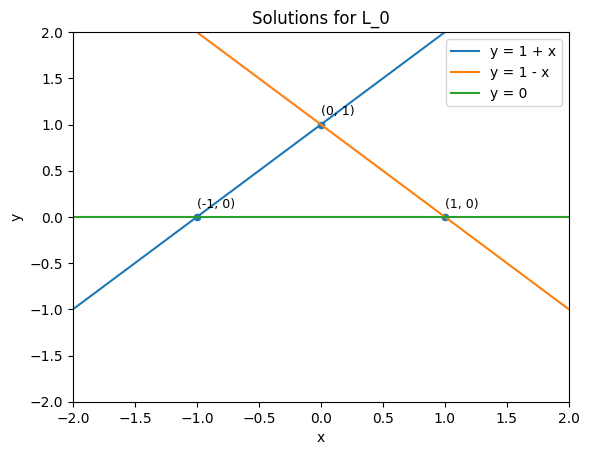

In [16]:
def y_1(x):
    return 1 + x
def y_2(x):
    return 1 - x
def y_3(x):
    return 0 + 0*x

sb.scatterplot(x=x_vals, y=y_vals)
x_range = np.linspace(-2, 2, 100)
plt.plot(x_range, y_1(x_range), label='y = 1 + x')
plt.plot(x_range, y_2(x_range), label='y = 1 - x')
plt.plot(x_range, y_3(x_range), label='y = 0')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Solutions for L_0')
for x, y in zip(x_vals, y_vals):
    plt.text(x, y + 0.1 , f'({x}, {y})', fontsize=9)


### Problem 1.3 (Exam Style)

$$ L_T(b, w) = \frac{1}{3} \left[ |y_1 - (b+wx_1)| + |y_2 - (b+wx_2)| + |y_3 - (b+wx_3)|\right] $$
Substituting gives us
$$ L_T(b, w) = \frac{1}{3} \left[ |0 - (b+w(-1))| + |1 - (b+w0)| + |0 - (b+w1)|\right]$$
Simplify
$$ L_T(b, w) = \frac{1}{3} \left[ |-b+w| + |1 - b| + |-b-w|\right] $$

### Problem 1.4 (Exam Style)

**Lemma**

The optimal regression line $L^*$ when using $\text{L}_1$ loss for specific three point training _T_ given above must intersect the $y$ axis at an intercept $y = b^*$ where $b^* \ge 0$ 

**Proof** 

Proof by contradiction. We adapt the proof given in the assignment for our new case. 

We define the error $e_k$ and loss $\lambda_k$ like the previous proof. 

We construct a $L_0$ with $(b_0, w_0)$ and $b_0 < 0$

We can construct a new line $L_1$ with $(b_1, w_1)$ where $b_1 = 0$ and $w_1 = w_0$. We get a simple transformation of our previous fit. For our defined errors and losses follows that each error changes by $\epsilon = 0 - b_0$

$e_2$ will always be reduced by $\epsilon$ no matter the slope. For $e_s$ and $e_g$ we have various cases that need to be considered. One should be able to tell that by shifting the line up we always will reduce atleast one of the two errors while worst case increasing the other error by the same amount. 

Taking the example in the assignment we would decrease $e_s$ by $\epsilon$ and increase $e_g$ by $\epsilon$.

In total we will always reduce two or more of the three $e_k$ by $\epsilon$ while increasing one or less of $e_k$ by a maximum of $\epsilon$ 

Assuming the worst case we can deduce: 

$L_T(b_1, w_1) < L_T(b_0, w_0)$

We have contradicted our assumption that $b^* < 0$ and therefore have proven the Lemma by contradiction


### Problem 1.5 (Exam Style)

**Lemma**

For any intercept $b^*$ in the interval $0 \leq b^* \leq 1$ and for the specific trainint set _T_ given earlier the slope $w^*$ of the optimal line must follow the constraints $-b^* \leq w^* \leq b^*$ if we use $L_1$ for regression 

**Proof**

Proof by contradiction

We choose a line so that $b^* = b_0$ for b_0 in the defined interval and $w^* = w_0$ where $w_0 > b^*$

This means we have the errors, as previously defined and given in the figure below: 
- $e_2$ is fixed, its always the same error
- $e_1$ and $e_3$ increase/decrease by changing $w_0$

Lets fit a second line $L_1$ with $w_1 = b^*$ therefore $w_1 < w_0$ and $b_1 = b_0$

$e_3 = b^* + w_0$ and $e_1 = b^* - w_0$

The loss $\lambda$ for $w_0$ is: 
$$
\begin{align}
    \lambda_1 &= | - w_0 + b^* |  > 0\\
    \lambda_2 &= | w_0 + b^* | > 2 b^*
\end{align}
$$
The loss for $w_1$ is given:
$$
\begin{align}
    \lambda_1 &= | - w_1 + b^* | \\
    \lambda_2 &= | w_1 + b^* |
\end{align}
$$
Plugging in $w_1 = b^*$ we get
$$
\begin{align}
    \lambda_1 &= | - b^* + b^* | = 0 \\
    \lambda_2 &= | b^* + b^* | = 2 b^* 
\end{align}
$$

Since we know by definition that $w_1 < w_0$ it means that $e_3$ and $e_1$ decreases by $\epsilon = w_1 - w_0$.

If we chose $w_0 < -b^*$ we would have to choose $w_1 = -b^*$ and would get the same results, just flipped. 

This means since $e_2$ stays constant and both $e_1$ and $e_3$ decrease by $\epsilon$ we conclude. 
$$ L(b_1, w_1) < L(b_0, w_0) $$




![line with excessive slope](https://www2.cs.duke.edu/courses/fall25/compsci371/homework/2/tiny_T_line_slope.svg)

### Problem 1.6 (Exam Style)

We get $L(b, 0)$: 
$$
\begin{align}
    L(b, 0) &= \frac{1}{3} \left[ |-b+0| + |1 - b| + |-b-0|\right] \\
    L(b, 0) &= \frac{1}{3} \left[ b + |1 - b| + b\right] \\
    L(b, 0) &= \frac{1}{3} \left[ b + 1 \right]
\end{align}    
$$
We have $L(b, w)$ given: 
$$
\begin{align}
    L(b, w) &= \frac{1}{3} \left[ |-b+w| + |1 - b| + |-b-w|\right] \\
    L(b, w) &= \frac{1}{3} \left[ |-b+w| + |1 - b| + |-b-w|\right] \\
\end{align}
$$
For the given interval constraints on $w$ we get: 
$$
\begin{align}
    L(b, w) &= \frac{1}{3} \left[ |-b+w| + |1 - b| + |-b-w|\right] \\
    L(b, w) &= \frac{1}{3} \left[ |1 - b| + (|-b+w| + |-b-w|)\right] \\
    L(b, w) &= \frac{1}{3} \left[ |1 - b| + (|-w+b| + |w+b|)\right] \\
    L(b, w) &= \frac{1}{3} \left[ |1 - b| + (2b)\right] \\
    L(b, w) &= \frac{1}{3} \left[ b + 1 \right] \\
    L(b, w) &= L(b, 0)
\end{align}
$$


### Problem 1.7 (Exam Style)

$$
T = \{ (x_1, y_1), (x_2, y_2), (x_3, y_3) \}
= \{ (-1,0), (0,1), (1,0) \}
$$

$$
\begin{align}
    b^*, w^* &= \arg \min_{b,w} L_T(b,w) \\
    &= \arg \min_{b} L_T(b,0) \\
    &= \arg \min_{b} \frac{b+1}{3} \\ 
\end{align}
$$
We get $b^* = 0$ and this forces $w^*$ with the given constraints to also be $w^* = 0$ 

The residual loss is given by 
$$ L(0,0) = \frac13 $$


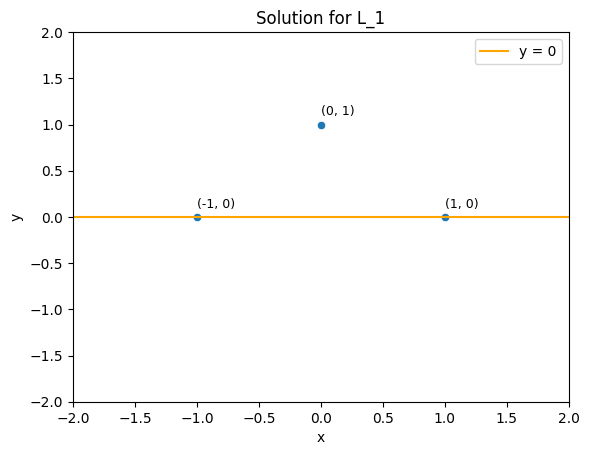

In [17]:
sb.scatterplot(x=x_vals, y=y_vals)
x_range = np.linspace(-2, 2, 100)
plt.plot(x_range, y_3(x_range), color='orange', label='y = 0')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Solution for L_1')
for x, y in zip(x_vals, y_vals):
    plt.text(x, y + 0.1 , f'({x}, {y})', fontsize=9)


## Part 2: Linear Regression is not Just About Lines 

### Problem 2.1 (Exam Style)

$$
x = \begin{bmatrix} \cos(2\pi z) \\ \sin(2\pi z) \end{bmatrix}
$$

$$
x_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
x_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
x_3 = \begin{bmatrix} -1 \\ 0 \end{bmatrix}, \quad
x_4 = \begin{bmatrix} 0 \\ -1 \end{bmatrix}
$$

$$
w = \begin{bmatrix} c \\ s \end{bmatrix}
= \begin{bmatrix} -2 \\ 0 \end{bmatrix}, \quad
v = \begin{bmatrix} b \\ c \\ s \end{bmatrix}
= \begin{bmatrix} 0 \\ -2 \\ 0 \end{bmatrix}
$$

$$
A =
\begin{bmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 0 \\
1 & 0 & -1
\end{bmatrix},
\quad
y =
\begin{bmatrix}
-2 \\ 0 \\ 2 \\ 0
\end{bmatrix}
$$

$$
A^T A =
\begin{bmatrix}
4 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 2
\end{bmatrix},
\quad
A^T y =
\begin{bmatrix}
0 \\ -4 \\ 0
\end{bmatrix}
$$

$$
b = 0, \quad c = -2, \quad s = 0
$$

$$
h(z) = -2 \cos(2 \pi z)
$$

![image](./hz.png)

### Problem 2.2

In [18]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [19]:
def retrieve(file_name, semester='fall25', homework=2):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [20]:
file_name = 'large_T.pickle'
retrieve(file_name)
with open(file_name, "rb") as file:
    large_T = pickle.load(file)

Using previously downloaded file large_T.pickle


In [21]:
z,y = large_T['z'],large_T['y']

In [22]:
import numpy as np
import math

def a_matrix(z,m):
    n = len(z)
    xs = []
    for i in range(n):
        x = np.zeros(2*m+1)
        x[0] = 1
        for j in range(1,m+1):
            x[j] = round(math.cos(2*math.pi*j*z[i]),3)
        for j in range(1,m+1):
            x[j+m] = round(math.sin(2*math.pi*j*z[i]),3)
        xs.append(x)

    A = np.stack(xs)
    return A

def a_matrix_vectorized(z,m):
    z = np.asarray(z)
    n = len(z)

    j = np.arange(1,m+1)
    Z, J = np.meshgrid(z,j, indexing='ij')

    coses = np.round(np.cos(2*np.pi*Z*J),3)
    sines = np.round(np.sin(2*np.pi*Z*J),3)

    A = np.concatenate((np.ones((n,1)),coses, sines), axis=1)
    return A

In [23]:
def fit_h(z, y, m):
    A = a_matrix(z, m)
    v = np.linalg.lstsq(A, y)[0]
    b, c, s = v[0], v[1:m+1], v[m+1:2*m+1]
    return b, c, s

In [24]:
import matplotlib.pyplot as plt

In [25]:
def h(z, b, c, s):
    m = len(c)
    k = np.arange(1,m+1)
    return b + np.dot(c, np.cos(2*np.pi* k * z)) + np.dot(s, np.sin(2*np.pi* k * z))

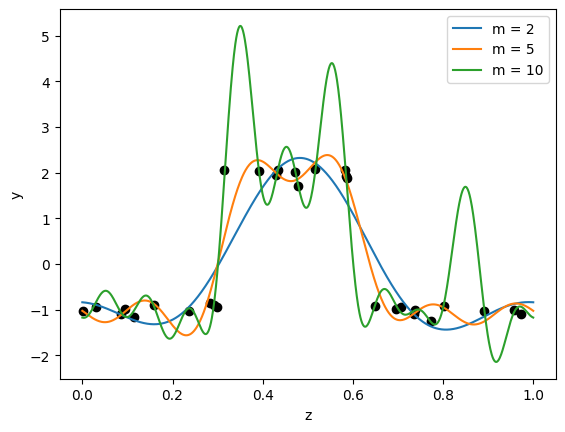

In [26]:
fig, ax = plt.subplots()
ax.scatter(z,y, color="black")

Z = np.linspace(0, 1, 1000)
for m in (2,5,10):
    b,c,s = fit_h(z, y, m)
    Y = [h(z,b,c,s) for z in Z]
    ax.plot(Z,Y,label=f"m = {m}")

ax.set_xlabel("z")
ax.set_ylabel("y")
ax.legend()

### Problem 2.3 (Exam Style)

The functions approximate the points in large_T.

The average loss gets better as m increases.

The ability to generalize gets worse as m increases.

The worse ability to generalize as m increases means that function h is overfit to the training data.

If the goal is to use h(z) to predict values y for new data points z that are not in the training set, then an m that is too high will result in worse predictions for the new data points.

A plot of risk (RMSE) and m is displayed below (for fun!)


m = 0, RMSE=1.40894
m = 2, RMSE=0.54351
m = 4, RMSE=0.47874
m = 6, RMSE=0.37164
m = 8, RMSE=0.26158
m = 10, RMSE=0.18219
m = 12, RMSE=0.05949
m = 14, RMSE=0.00605
m = 16, RMSE=0.00208
m = 18, RMSE=0.00123


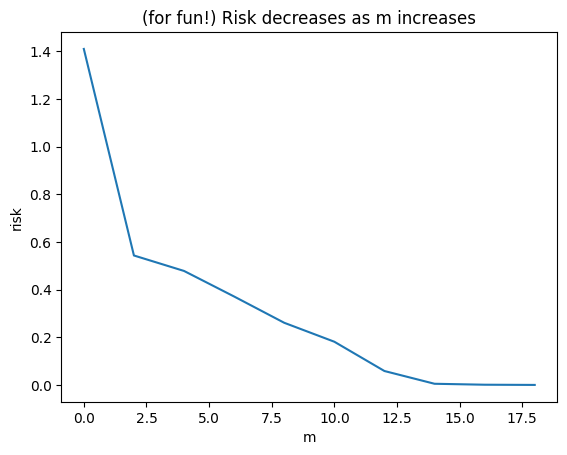

In [27]:
### THIS IS FOR FUN AND NOT TO BE GRADED!

def RMSE(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true)**2))

M = range(0,20,2)
risks = []

for m in M:
    b,c,s = fit_h(z,y,m)
    y_pred = [h(Z,b,c,s) for Z in z]
    risk = RMSE(y_pred, y)
    risks.append(risk)
    print(f'm = {m}, RMSE={round(risk,5)}')

fig, ax = plt.subplots()
ax.set_xlabel("m")
ax.set_ylabel("risk")
ax.set_title("(for fun!) Risk decreases as m increases")
plt.plot(M, risks)
plt.show()

### Problem 3.1

Used 437 iterations
Used 770 iterations
Used 17749 iterations


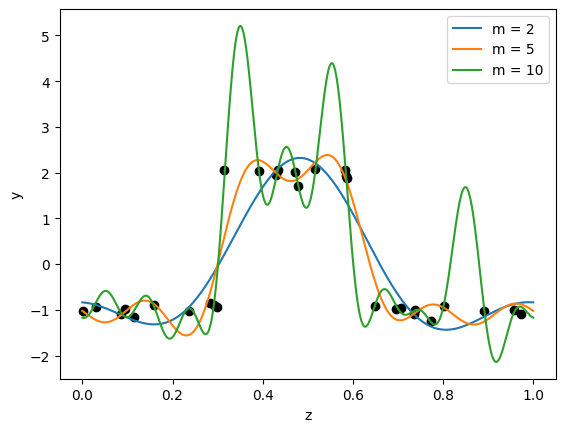

In [28]:
def gradient_descent(g, v0, alpha=1.e-3, delta=1.e-6, k_max=100_000):
    v_old = v0
    for k in range(k_max):
        v = v_old - alpha*g(v_old)
        if np.linalg.norm(v - v_old) <= delta:
            print(f"Used {k} iterations")
            return v
        v_old = v
    print(f"WARNING: Iteration limit {k_max} exceeded.")
    return v

fig, ax = plt.subplots()
ax.scatter(z,y, color="black")

Z = np.linspace(0, 1, 1000)

for m in (2,5,10):
    v0 = np.zeros(2*m+1)
    A = a_matrix(z,m)

    def g(v):
        return 2*A.T@(A@v - y)
    
    v_f = gradient_descent(g, v0)
    b, c, s = v_f[0], v_f[1:m+1], v_f[m+1:2*m+1]

    b_fit,c_fit,s_fit = fit_h(z, y, m)

    Y = [h(z,b,c,s) for z in Z]
    ax.plot(Z,Y,label=f"m = {m}")

ax.set_xlabel("z")
ax.set_ylabel("y")
ax.legend()


### Problem 3.2 (Exam Style)

It is OK to start with v0 as the zero vector in the previous problem because the loss function L2 is a quadratic function and its parameters b,c,s appear linearly in h(z). 

Therefore, the loss function is convex and no spurious local minima.

It is like a elliptical paraboloid bowl in higher dimensions. There is just one (global) minima.

Therfore, it is OK to start at any vector, because all vectors will converge to the global minima via gradient descent. v0 = zero is a decent default because there is no bias in any starting point.

## Part 4: Gradient and Hessian

### Problem 4.1 (Exam Style)

$$
L_T(b,w) = \frac{1}{3} \sum_{n=1}^3 (b + w x_n - y_n)^4
$$

$$
\nabla L_T(b,w) =
\begin{bmatrix}
\displaystyle \frac{4}{3} \sum_{n=1}^3 (b + w x_n - y_n)^3 \\
\displaystyle \frac{4}{3} \sum_{n=1}^3 x_n (b + w x_n - y_n)^3
\end{bmatrix}
$$

$$
\nabla L_T(0,0) =
\begin{bmatrix}
\displaystyle -32/3 \\
\displaystyle -96/3
\end{bmatrix}
$$

### Problem 4.2 (Exam Style)

$$
H_{L_T}(b,w) =
\begin{bmatrix}
\displaystyle 4 \sum_{n=1}^3 (b + w x_n - y_n)^2 & \displaystyle 4 \sum_{n=1}^3 x_n (b + w x_n - y_n)^2 \\
\displaystyle 4 \sum_{n=1}^3 x_n (b + w x_n - y_n)^2 & \displaystyle 4 \sum_{n=1}^3 x_n^2 (b + w x_n - y_n)^2
\end{bmatrix}
$$

$$
H_{L_T}(0,0) =
\begin{bmatrix}
16 & 48 \\
48 & 144
\end{bmatrix}
$$